In [282]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [283]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [284]:
data.duplicated().sum()

107

In [285]:
data = data.drop_duplicates()

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


In [287]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [288]:
data = data.drop(["deck","embarked"],axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [289]:
data = data.rename(columns={"sex": "Gender"})
data.head()

,survived,pclass,Gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [290]:
data = data.replace(["male","female"],["M","F"])
data.head()

,survived,pclass,Gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,M,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,F,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,F,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,F,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,M,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [291]:
data["age"].mean()

29.869351032448375

In [292]:
data["age"].median()

28.25

In [293]:
data["age"].mode()[0]

24.0

In [294]:
data["age"].min()

0.42

In [295]:
data["age"].max()

80.0

Filling age null values using mean will be best option because the max age is 80 and low is 0.42 so acoording to this data mean can give almost correct age value for missing age values.

In [296]:
data["age"] = data["age"].fillna(data["age"].mean())

Filling embark_town null values using mode will be best option because the more time repeated value is embark_town so acoording to this data mode can give almost correct embark_town value for missing embark_town values.

In [297]:
data["embark_town"] = data["embark_town"].fillna(data["embark_town"].mode()[0])

In [298]:
plt.style.use("dark_background")

maleData = data[data["Gender"] == "M"]
femaleData = data[data["Gender"] == "F"]

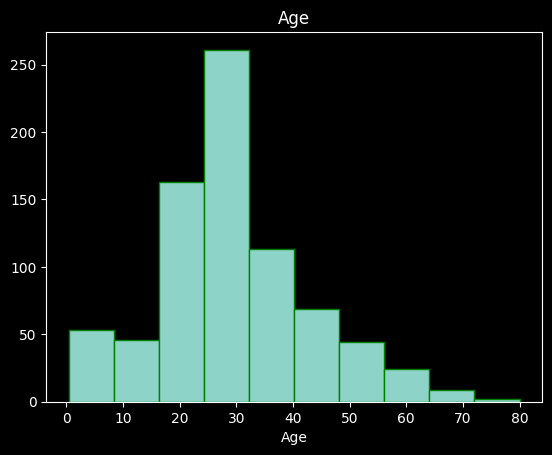

In [299]:
plt.title("Age")
plt.hist(data["age"],edgecolor="g")
plt.xlabel("Age")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

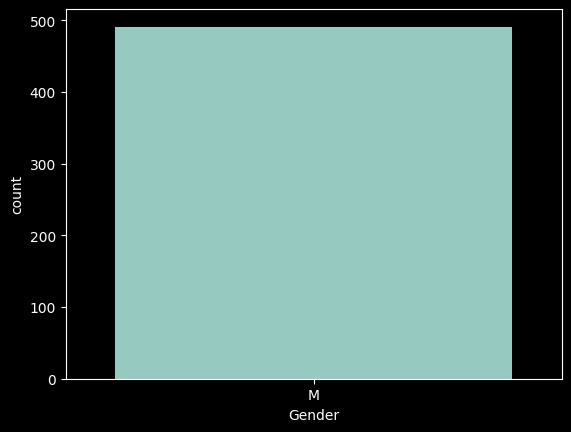

In [300]:
sns.countplot(data=maleData,x="Gender")

<Axes: xlabel='Gender', ylabel='count'>

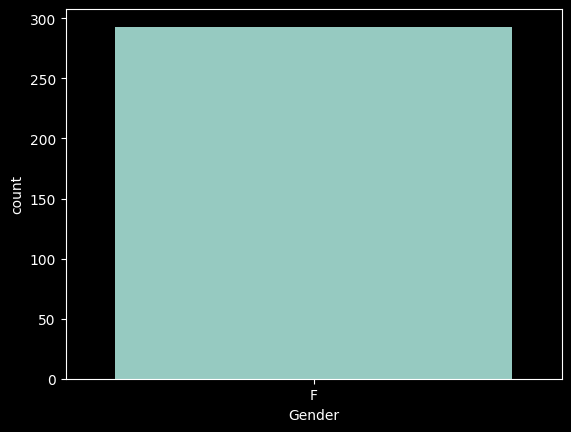

In [301]:
sns.countplot(data=femaleData,x="Gender")

So according to above analysis more no of males are present in the dataSet.

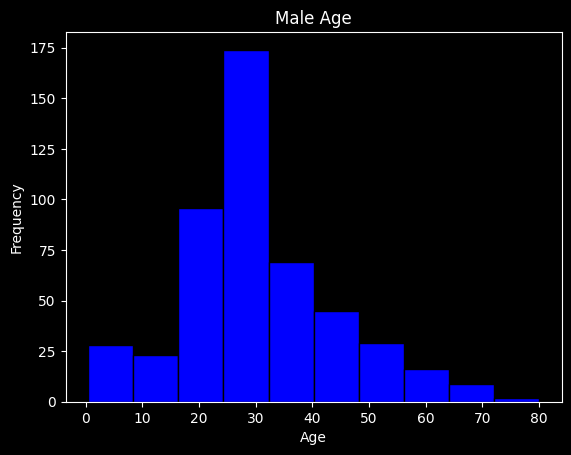

In [302]:
plt.title("Male Age")
plt.hist(maleData["age"],edgecolor="k",color="b")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

There are more males they have age between 25-32

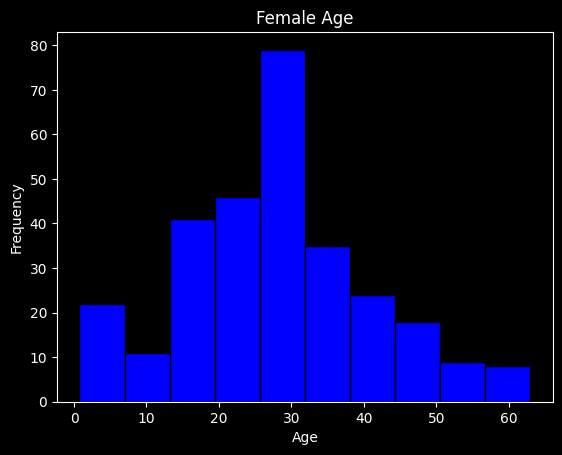

In [303]:
plt.title("Female Age")
plt.hist(femaleData["age"],edgecolor="k",color="b")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

There are more females they have age between 26-32

In [304]:
liveMaleData = maleData[maleData["alive"] == "yes"]
liveFemaleData = femaleData[femaleData["alive"] == "yes"]

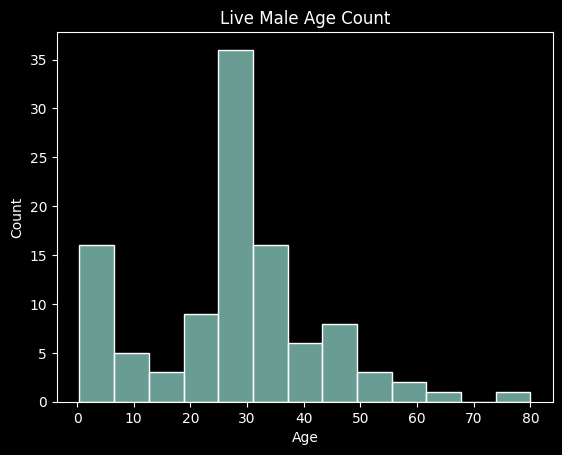

In [305]:
plt.title("Live Male Age Count")
sns.histplot(data=liveMaleData, x="age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

There are more live males they have age between 25-31

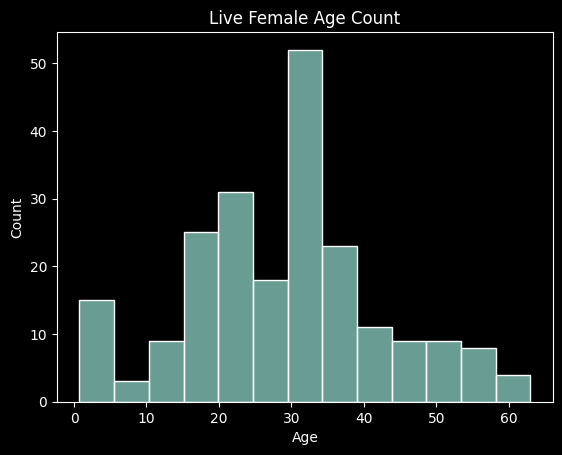

In [306]:
plt.title("Live Female Age Count")
sns.histplot(data=liveFemaleData, x="age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

There are more live females they have age between 30-35

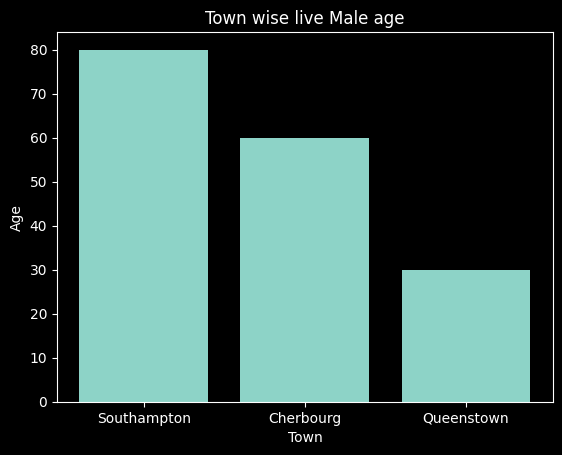

In [307]:
plt.title("Town wise live Male age")
plt.bar(liveMaleData["embark_town"],liveMaleData["age"])
plt.xlabel("Town")
plt.ylabel("Age")
plt.show()

There are more live males from Southampton town

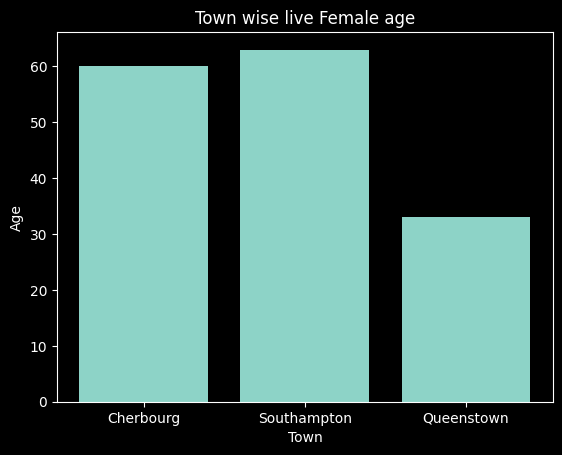

In [308]:
plt.title("Town wise live Female age")
plt.bar(liveFemaleData["embark_town"],liveFemaleData["age"])
plt.xlabel("Town")
plt.ylabel("Age")
plt.show()

There are more live females from Southampton town

In [309]:
maleAllDataByWho = liveMaleData.groupby("who").size().reset_index(name="count")

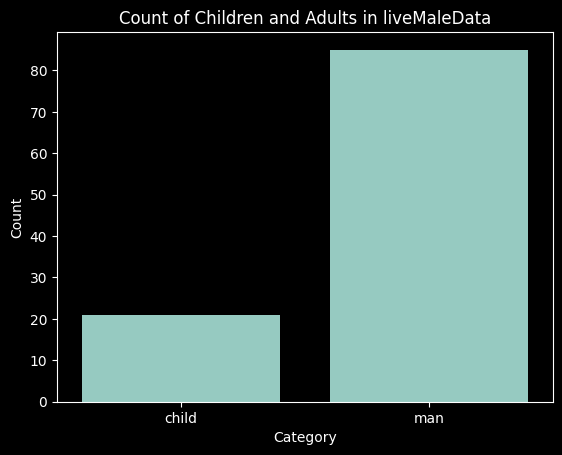

In [310]:
plt.title("Count of Children and Adults in liveMaleData")
sns.barplot(data=maleAllDataByWho, x="who", y="count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

There are more surviving males in the dataset.

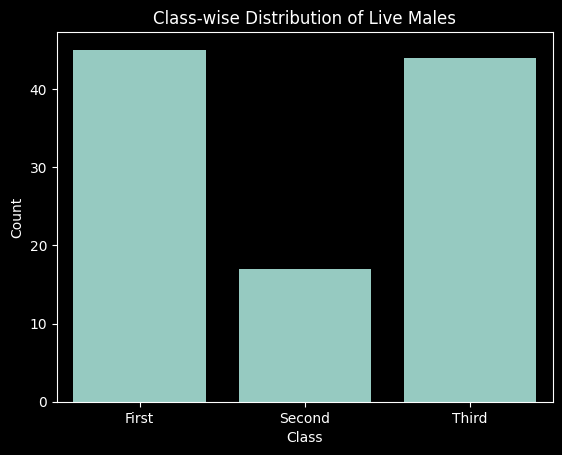

In [311]:
plt.title("Class-wise Distribution of Live Males")
sns.countplot(liveMaleData,x="class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

There are more surviving males which are belongs from First class.

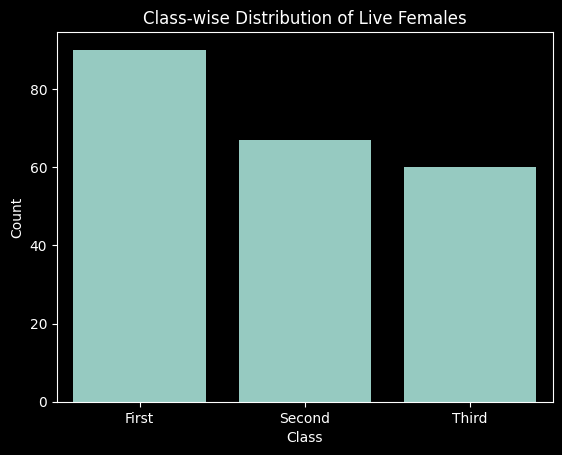

In [312]:
plt.title("Class-wise Distribution of Live Females")
sns.countplot(liveFemaleData,x="class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

There are more surviving females which are belongs from First class.

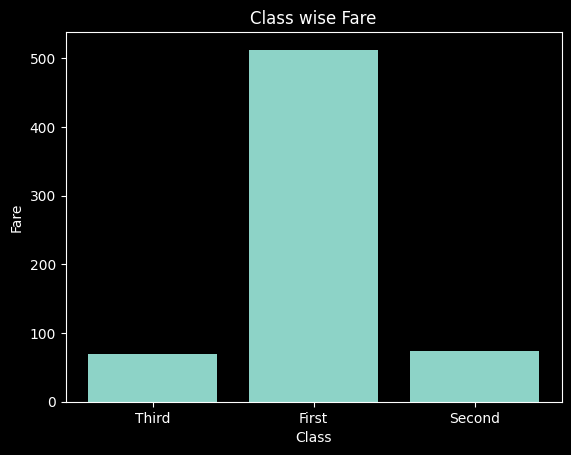

In [313]:
plt.title("Class wise Fare")
plt.bar(data["class"],data["fare"])
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

There are more fare which is belongs from First class.

In [314]:
groped_Live_Male = liveMaleData.groupby(["who","class"]).size().reset_index(name="count")

In [315]:
groped_Live_Female = liveFemaleData.groupby(["who","class"]).size().reset_index(name="count")

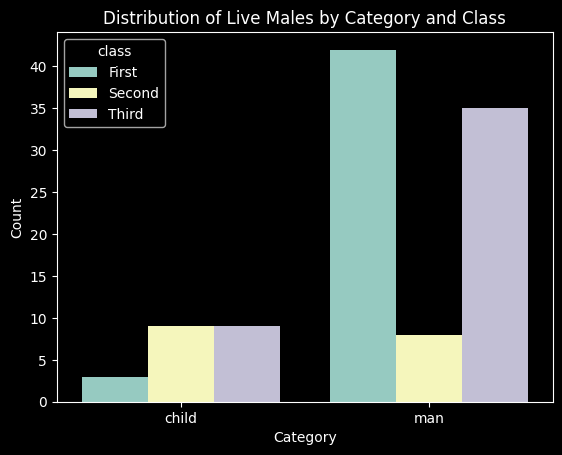

In [316]:
plt.title("Distribution of Live Males by Category and Class")
sns.barplot(data=groped_Live_Male,x="who",y="count",hue="class")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

The graph illustrates that the number of male survivors is higher than that of children. Additionally, a significant portion of male survivors are from the First class.

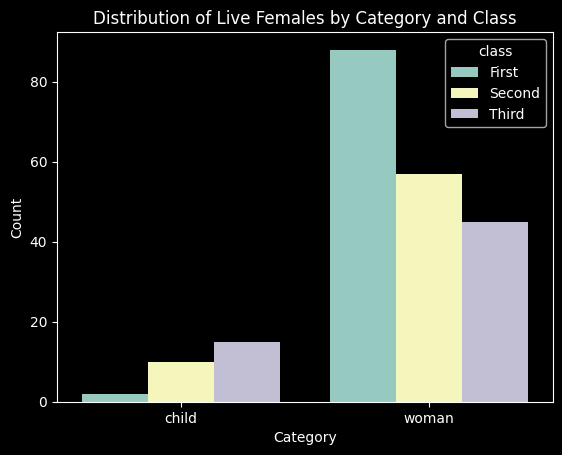

In [317]:
plt.title("Distribution of Survive Females by Category and Class")
sns.barplot(data=groped_Live_Female,x="who",y="count",hue="class")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

The graph reveals that the number of female survivors is greater compared to children. Furthermore, a notable proportion of female survivors originate from the First class.

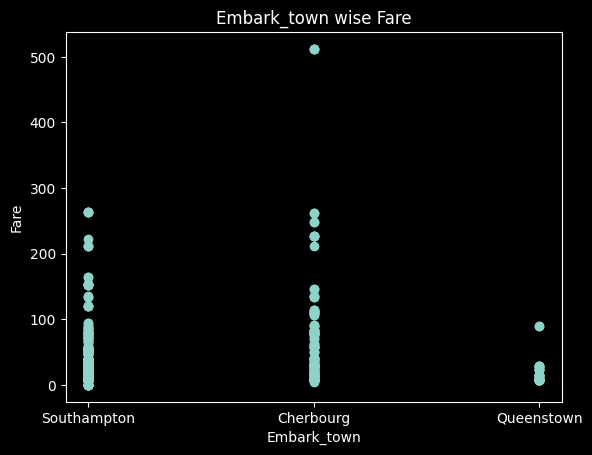

In [318]:
plt.title("Embark_town wise Fare")
plt.scatter(data["embark_town"],data["fare"])
plt.xlabel("Embark_town")
plt.ylabel("Fare")
plt.show()

Cherbourg town has highest fare.

In [319]:
grouped_data = data.groupby(["who", "class"]).size().reset_index(name="Count")

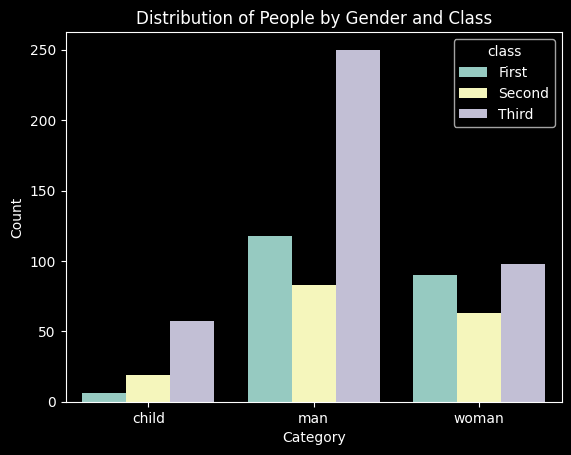

In [320]:
plt.title('Distribution of People by Gender and Class')
sns.barplot(data=grouped_data,x="who",y="Count",hue="class")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

More males are from the first class.

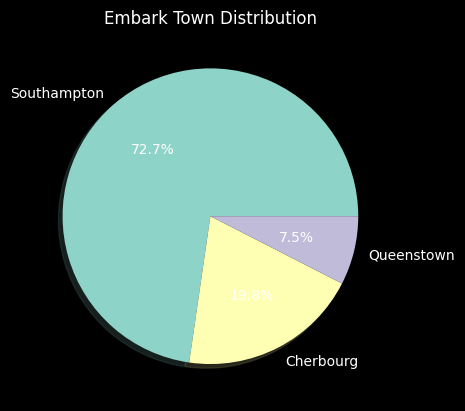

In [321]:
embark_town_count = data['embark_town'].value_counts()
plt.pie(embark_town_count,labels=embark_town_count.index,autopct='%1.1f%%',shadow=True)
plt.title('Embark Town Distribution')
plt.show()

The pie chart illustrates the distribution of embarkation towns, with Southampton having the highest proportion.

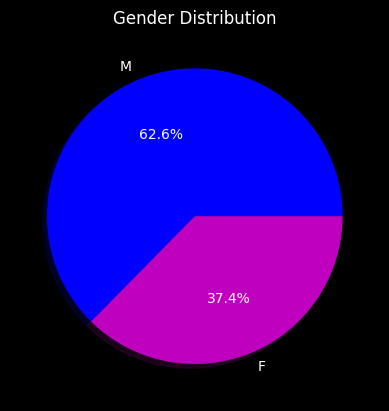

In [322]:
gender_count = data['Gender'].value_counts()
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',shadow=True,colors=["b","m"])
plt.title('Gender Distribution')
plt.show()

The pie chart shows the gender distribution, with males representing a larger percentage.

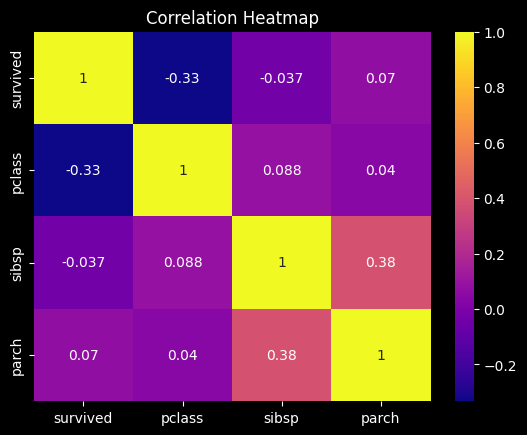

In [323]:
numericalData = data.select_dtypes("int").corr()

sns.heatmap(numericalData,annot=True,cmap="plasma")
plt.title('Correlation Heatmap')
plt.show()

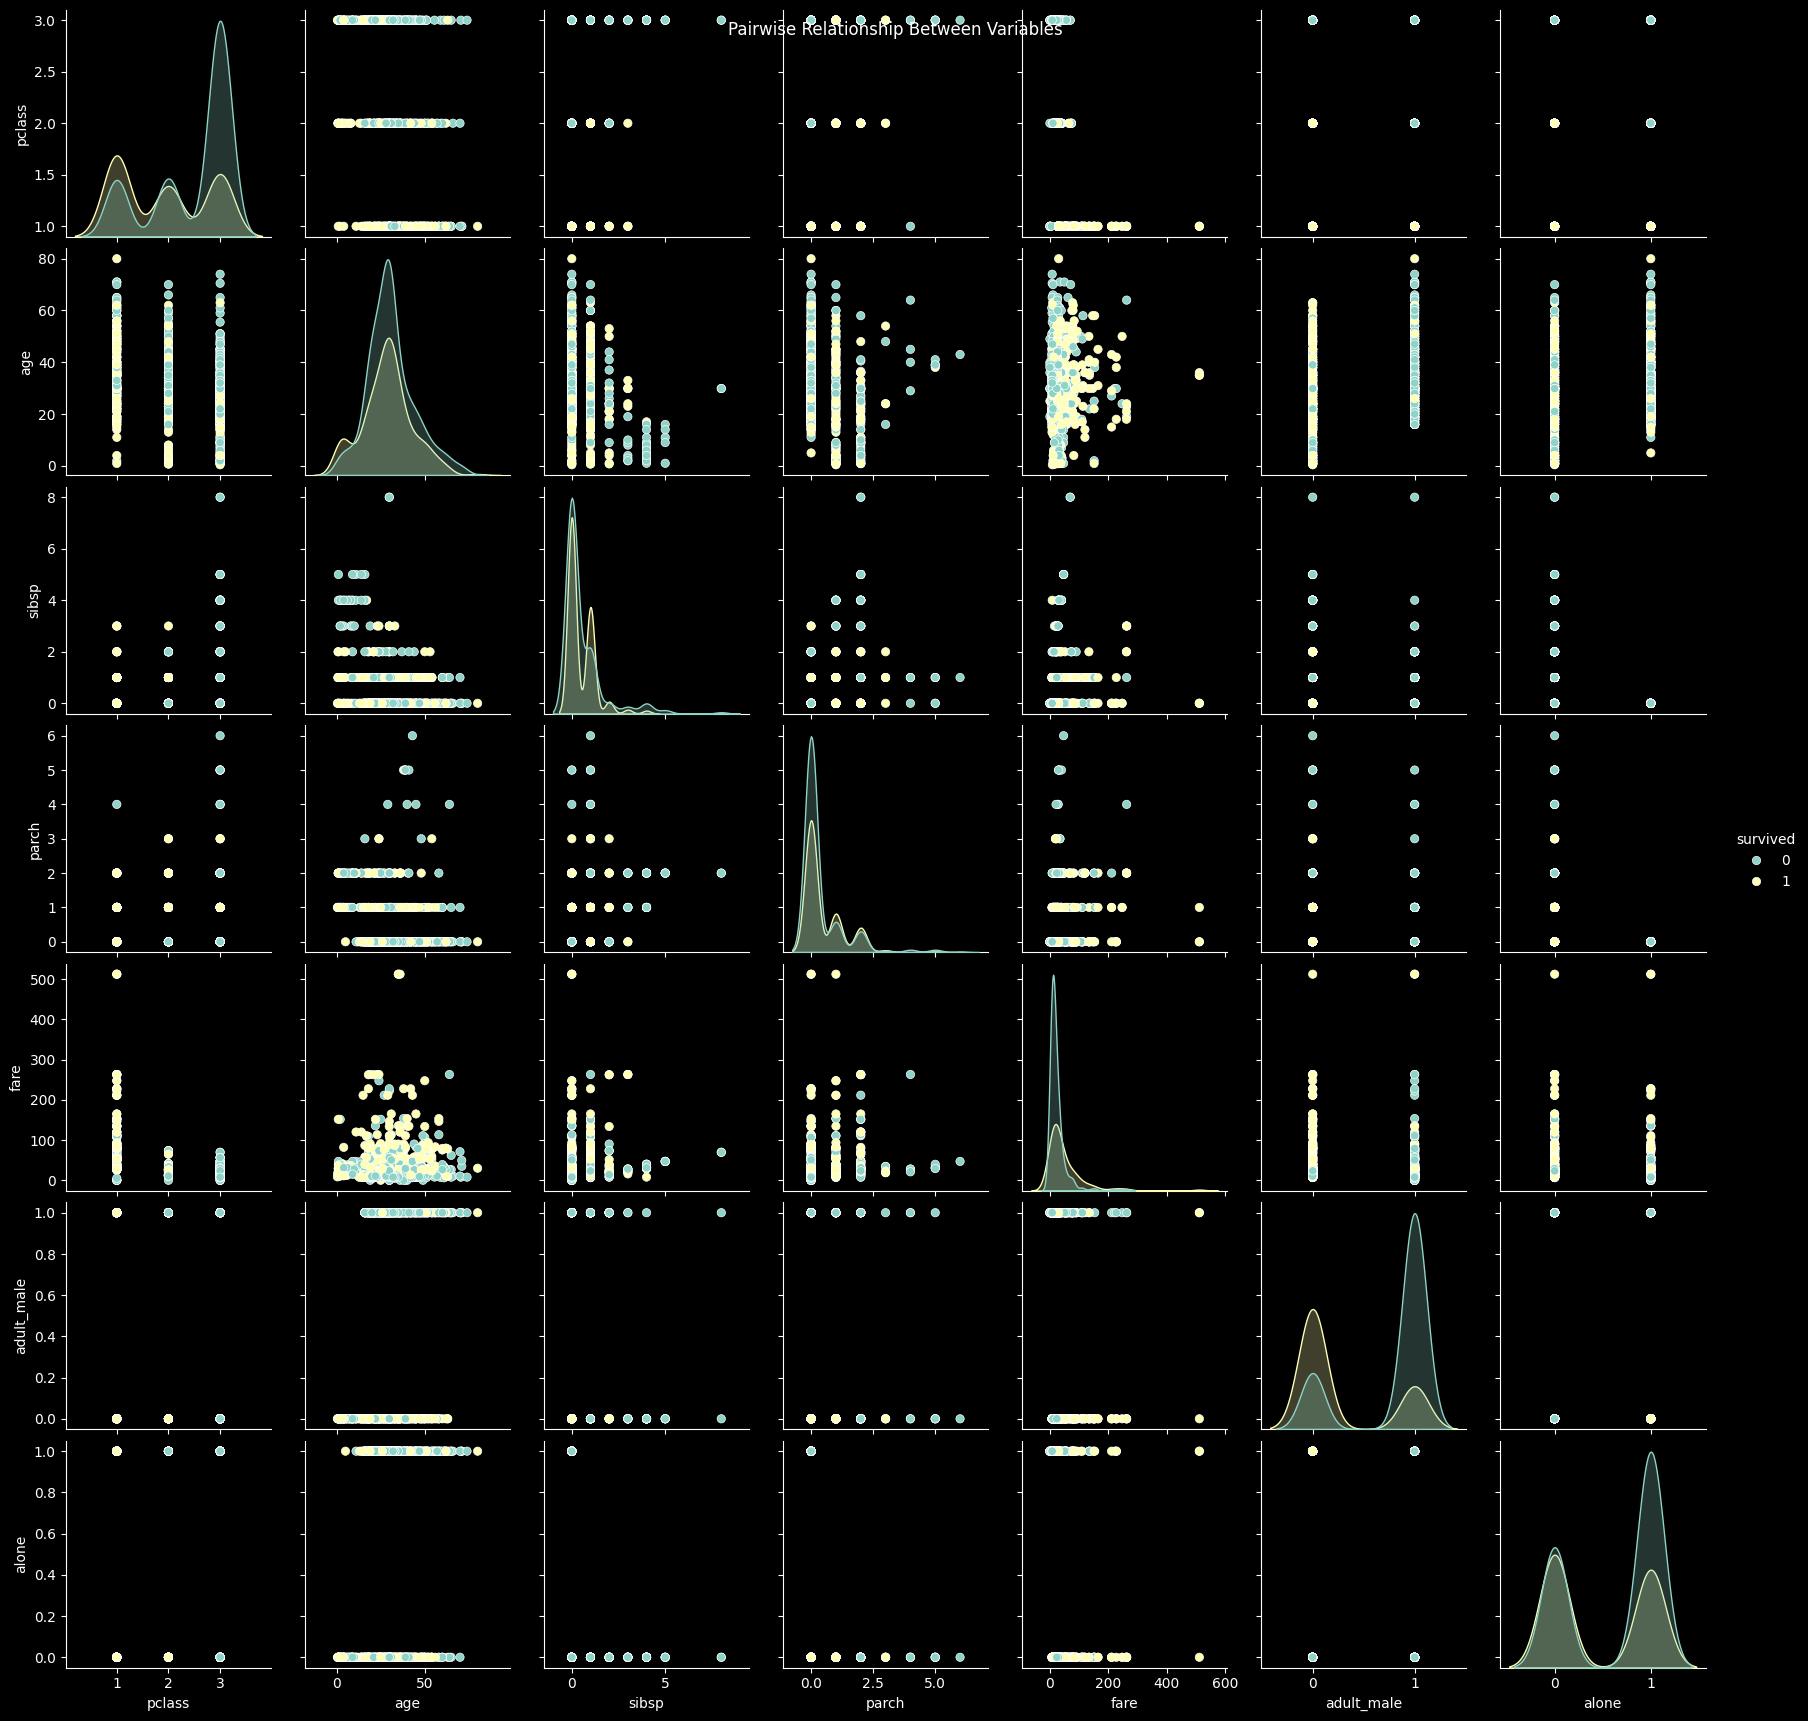

In [324]:
sns.pairplot(data,hue="survived")
plt.suptitle("Pairwise Relationship Between Variables")
plt.show()

LabelEncoding

In [328]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

data["class"] = labelEncoder.fit_transform(data["class"])
data["who"] = labelEncoder.fit_transform(data["who"])
data["embark_town"] = labelEncoder.fit_transform(data["embark_town"])

OHE(One Hot Encoding)

In [329]:
# import pandas as pd

# data = pd.get_dummies(data,columns=["who"],prefix="_")

In [330]:
data

,survived,pclass,Gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,M,22.000000,1,0,7.2500,2,1,True,2,no,False
1,1,1,F,38.000000,1,0,71.2833,0,2,False,0,yes,False
2,1,3,F,26.000000,0,0,7.9250,2,2,False,2,yes,True
3,1,1,F,35.000000,1,0,53.1000,0,2,False,2,yes,False
4,0,3,M,35.000000,0,0,8.0500,2,1,True,2,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,F,39.000000,0,5,29.1250,2,2,False,1,no,False
887,1,1,F,19.000000,0,0,30.0000,0,2,False,2,yes,True
888,0,3,F,29.869351,1,2,23.4500,2,2,False,2,no,False
889,1,1,M,26.000000,0,0,30.0000,0,1,True,0,yes,True
